### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [ ]:
### Data Collection
import pandas_datareader as pdr
key="e04ef0e8b0cfbcd643df6"

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
df = pdr.get_data_tiingo('GOOGL', api_key='e04ef0e8b0cfbcd643df66')

In [ ]:
df.to_csv('GOOGL.csv')

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('GOOGL.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOGL,2015-09-16 00:00:00+00:00,665.52,668.0699,662.20,665.55,1312598,665.52,668.0699,662.20,665.55,1312598,0.0,1.0
1,GOOGL,2015-09-17 00:00:00+00:00,671.67,681.9900,665.00,667.49,2387605,671.67,681.9900,665.00,667.49,2387605,0.0,1.0
2,GOOGL,2015-09-18 00:00:00+00:00,660.92,669.8400,660.03,665.06,3627210,660.92,669.8400,660.03,665.06,3627210,0.0,1.0
3,GOOGL,2015-09-21 00:00:00+00:00,666.98,669.0000,658.00,665.51,1954667,666.98,669.0000,658.00,665.51,1954667,0.0,1.0
4,GOOGL,2015-09-22 00:00:00+00:00,653.20,658.8200,645.03,657.47,2718081,653.20,658.8200,645.03,657.47,2718081,0.0,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,GOOGL,2020-09-04 00:00:00+00:00,1581.21,1634.990,1537.9701,1609.00,2792533,1581.21,1634.990,1537.9701,1609.00,2792533,0.0,1.0
1253,GOOGL,2020-09-08 00:00:00+00:00,1523.60,1555.550,1516.5000,1525.00,2701586,1523.60,1555.550,1516.5000,1525.00,2701586,0.0,1.0
1254,GOOGL,2020-09-09 00:00:00+00:00,1547.23,1558.720,1525.1700,1548.90,1962078,1547.23,1558.720,1525.1700,1548.90,1962078,0.0,1.0
1255,GOOGL,2020-09-10 00:00:00+00:00,1526.05,1573.660,1520.0000,1550.18,1651194,1526.05,1573.660,1520.0000,1550.18,1651194,0.0,1.0
1256,GOOGL,2020-09-11 00:00:00+00:00,1515.76,1538.695,1493.0200,1528.15,1535337,1515.76,1538.695,1493.0200,1528.15,1535337,0.0,1.0


In [ ]:
# 2015-09-16 to 2020-09-11 (data)

In [ ]:
# Stock prediction for 'Close' column...(can be done for other columns also)
df1=df.reset_index()['close']

In [ ]:
# number of records
df1.shape

(1257,)

In [ ]:
df1

0        665.52
1        671.67
2        660.92
3        666.98
4        653.20
         ...   
1252    1581.21
1253    1523.60
1254    1547.23
1255    1526.05
1256    1515.76
Name: close, Length: 1257, dtype: float64

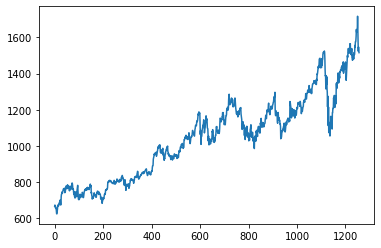

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so, apply MinMax scaler 

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1)) # scaling value(0 to 1)
df1=scaler.fit_transform(np.array(df1).reshape(-1,1)) #step for transform

In [ ]:
# (0 to 1) scaled values
print(df1)

[[0.03919509]
 [0.04481266]
 [0.03499333]
 ...
 [0.84457151]
 [0.82522516]
 [0.81582601]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(817, 440)

In [ ]:
train_data

array([[0.03919509],
       [0.04481266],
       [0.03499333],
       [0.04052869],
       [0.02794169],
       [0.0280239 ],
       [0.02950364],
       [0.01602148],
       [0.00149802],
       [0.        ],
       [0.01439559],
       [0.01771132],
       [0.03140357],
       [0.04482179],
       [0.04478525],
       [0.04328724],
       [0.04054696],
       [0.04441988],
       [0.04916056],
       [0.05531705],
       [0.052796  ],
       [0.06431429],
       [0.06641517],
       [0.07064433],
       [0.05242149],
       [0.0449314 ],
       [0.0534628 ],
       [0.08834652],
       [0.0991158 ],
       [0.10066863],
       [0.10441367],
       [0.11165714],
       [0.10484298],
       [0.11429694],
       [0.11528344],
       [0.12121157],
       [0.12610753],
       [0.12695701],
       [0.12071832],
       [0.12390617],
       [0.13029102],
       [0.12232595],
       [0.10729096],
       [0.11674492],
       [0.11268931],
       [0.12550467],
       [0.12544073],
       [0.141

In [ ]:
test_data

array([[0.41189097],
       [0.39195089],
       [0.36814702],
       [0.38436946],
       [0.37710773],
       [0.36625623],
       [0.33672519],
       [0.33071485],
       [0.38842507],
       [0.39303787],
       [0.38735636],
       [0.38578527],
       [0.39466377],
       [0.36798261],
       [0.41602879],
       [0.41406493],
       [0.4226968 ],
       [0.41929885],
       [0.41672299],
       [0.4036062 ],
       [0.39176821],
       [0.4237381 ],
       [0.42647838],
       [0.4352564 ],
       [0.44272822],
       [0.41654031],
       [0.42181991],
       [0.4214454 ],
       [0.43743949],
       [0.41766382],
       [0.40871225],
       [0.43422423],
       [0.4597088 ],
       [0.4530682 ],
       [0.4738943 ],
       [0.4834396 ],
       [0.45696852],
       [0.44145856],
       [0.43823417],
       [0.43799668],
       [0.46125249],
       [0.46221159],
       [0.46273224],
       [0.45399076],
       [0.46027512],
       [0.45486764],
       [0.43990573],
       [0.451

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train)

[[0.03919509 0.04481266 0.03499333 ... 0.09812017 0.07412448 0.07448985]
 [0.04481266 0.03499333 0.04052869 ... 0.07412448 0.07448985 0.0716217 ]
 [0.03499333 0.04052869 0.02794169 ... 0.07448985 0.0716217  0.07694697]
 ...
 [0.53935037 0.53919509 0.52658068 ... 0.45100385 0.40177935 0.41603793]
 [0.53919509 0.52658068 0.5254663  ... 0.40177935 0.41603793 0.38726502]
 [0.52658068 0.5254663  0.53745045 ... 0.41603793 0.38726502 0.39329363]]


In [ ]:
print(y_train)

[0.0716217  0.07694697 0.07649939 0.0769835  0.08680283 0.09989222
 0.08668408 0.09088584 0.09722501 0.08648313 0.0897806  0.09728895
 0.09339776 0.08641919 0.10920916 0.10675204 0.09954511 0.09829372
 0.08238185 0.08304865 0.09390014 0.1000749  0.11167541 0.1165805
 0.11688193 0.12308409 0.12410713 0.12130291 0.12746853 0.1255412
 0.12326678 0.12078226 0.11935731 0.13087561 0.1331135  0.12814447
 0.13432836 0.13017227 0.12418933 0.13286688 0.12560514 0.12501142
 0.12324851 0.12944153 0.13637443 0.13955315 0.14376404 0.15077915
 0.1403387  0.13912384 0.14376404 0.10519008 0.10924569 0.09386361
 0.09029211 0.07531193 0.07788779 0.08385246 0.07839931 0.08107565
 0.08412649 0.09369006 0.09729809 0.1066607  0.09859515 0.09632986
 0.09337036 0.0983668  0.08913206 0.09058441 0.08467455 0.09052047
 0.08644659 0.10086045 0.10549151 0.10442281 0.11416906 0.11531084
 0.1149546  0.11112735 0.10344544 0.09814757 0.0990884  0.10990336
 0.10952886 0.10100659 0.09981001 0.1010614  0.10009317 0.092840

In [ ]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test)

[[0.41189097 0.39195089 0.36814702 ... 0.52142896 0.50809295 0.50071247]
 [0.39195089 0.36814702 0.38436946 ... 0.50809295 0.50071247 0.49814575]
 [0.36814702 0.38436946 0.37710773 ... 0.50071247 0.49814575 0.49784432]
 ...
 [0.57986079 0.59956338 0.58325874 ... 1.         0.91972816 0.87560971]
 [0.59956338 0.58325874 0.53851002 ... 0.91972816 0.87560971 0.82298727]
 [0.58325874 0.53851002 0.58075595 ... 0.87560971 0.82298727 0.84457151]]


In [ ]:
print(ytest)

[0.49814575 0.49784432 0.46948245 0.45876797 0.50073074 0.51324467
 0.49888562 0.4768538  0.4857871  0.48707503 0.47747493 0.47132757
 0.47219533 0.45427392 0.45561665 0.44199748 0.38010377 0.39449022
 0.38549298 0.38834286 0.40716856 0.42031276 0.41874166 0.41696962
 0.42784852 0.42354628 0.43047918 0.44084656 0.44017976 0.44811743
 0.45923382 0.45131442 0.42471547 0.418084   0.41471346 0.42034929
 0.43606021 0.44756937 0.45705987 0.46589269 0.45139663 0.45824732
 0.47342845 0.47632401 0.47747493 0.48219734 0.48489194 0.47875372
 0.47921043 0.46487879 0.47187563 0.47995031 0.47235061 0.46888873
 0.56870787 0.56562049 0.55297868 0.54402711 0.53816292 0.52404136
 0.48607026 0.5009865  0.50539834 0.53305687 0.51726374 0.50411041
 0.52441586 0.4947478  0.49937887 0.50841265 0.52780467 0.51235865
 0.51971172 0.51965692 0.48500155 0.50107784 0.50074901 0.50342535
 0.52214143 0.51875263 0.49958896 0.51120773 0.53853742 0.53317562
 0.53221652 0.53260929 0.54567128 0.55934526 0.56396719 0.5562

In [ ]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 98ms/step - loss: 0.0387 - val_loss: 0.0383
Epoch 2/100
12/12 [==============================] - 0s 20ms/step - loss: 0.0081 - val_loss: 0.0087
Epoch 3/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0038 - val_loss: 0.0172
Epoch 4/100
12/12 [==============================] - 0s 17ms/step - loss: 0.0015 - val_loss: 0.0059
Epoch 5/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0012 - val_loss: 0.0046
Epoch 6/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0011 - val_loss: 0.0046
Epoch 7/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0011 - val_loss: 0.0046
Epoch 8/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0011 - val_loss: 0.0046
Epoch 9/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0010 - val_loss: 0.0044
Epoch 10/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0010 - val_loss: 0.0043

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

978.1796055036637

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1333.7796766618048

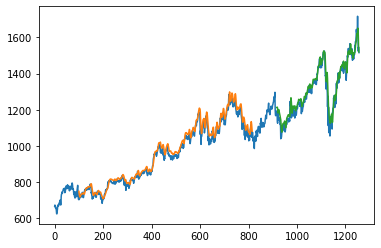

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

440

In [ ]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape


(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.5807559509673176,
 0.5924112607099142,
 0.5973711613292166,
 0.592128098796105,
 0.5571713038235991,
 0.657273607482782,
 0.6614022908712253,
 0.6345658488463434,
 0.6396627632949085,
 0.6635214380971518,
 0.6602422404501361,
 0.6820274393028735,
 0.6957836277608284,
 0.7133670691828494,
 0.687416649920532,
 0.6628911744825442,
 0.6706826942399383,
 0.6854801878002884,
 0.6965509052046986,
 0.686704178008367,
 0.7184548493761304,
 0.716253493852646,
 0.7221816255320702,
 0.7296077750780977,
 0.7286121412521235,
 0.7267487531741536,
 0.7407058952483602,
 0.7419390197117227,
 0.7487349056431428,
 0.7459398235261877,
 0.7231498565921918,
 0.7466431611830685,
 0.7539688339209704,
 0.7576590730557736,
 0.769186503224392,
 0.7118233800398254,
 0.721889329362977,
 0.7290323169951952,
 0.7525347558413561,
 0.7580792487988454,
 0.7412539505654102,
 0.7325946765560204,
 0.756362008805422,
 0.7685288368439319,
 0.7399568863150586,
 0.7476296607537586,
 0.6758709512413451,
 0.7075028772904145,


In [ ]:
# Prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.81887084]
101
1 day input [0.59241126 0.59737116 0.5921281  0.5571713  0.65727361 0.66140229
 0.63456585 0.63966276 0.66352144 0.66024224 0.68202744 0.69578363
 0.71336707 0.68741665 0.66289117 0.67068269 0.68548019 0.69655091
 0.68670418 0.71845485 0.71625349 0.72218163 0.72960778 0.72861214
 0.72674875 0.7407059  0.74193902 0.74873491 0.74593982 0.72314986
 0.74664316 0.75396883 0.75765907 0.7691865  0.71182338 0.72188933
 0.72903232 0.75253476 0.75807925 0.74125395 0.73259468 0.75636201
 0.76852884 0.73995689 0.74762966 0.67587095 0.70750288 0.7265752
 0.74845174 0.77396372 0.80111073 0.7922231  0.80471876 0.81847494
 0.83706315 0.81260162 0.82048448 0.81684905 0.81505873 0.81682164
 0.85974351 0.85250918 0.86066607 0.8167303  0.80892965 0.82831254
 0.80476443 0.82290506 0.83647856 0.79042365 0.78568297 0.77704196
 0.7823307  0.80595188 0.79994154 0.79852573 0.78365516 0.80804363
 0.81663896 0.80565958 0.81626445 0.8523813  0.84217834 0.87107912
 0.87045799 0.87920861 0.89811652 

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1257

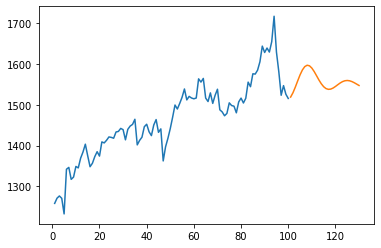

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

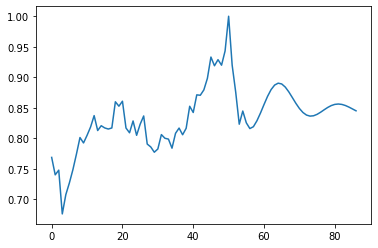

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

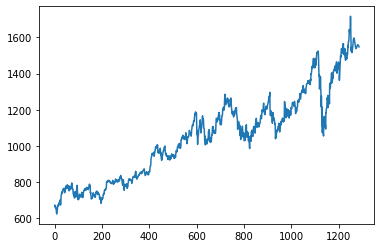

In [ ]:
plt.plot(df3)

In [ ]:
# Steps :

# Collecting data
# Preprocessing data
# Create Stacked LSTM model
# Predict test and plot output
# Predict future 30 days and plot